# Klasifikasi Arrhythmia Berdasarkan R-R Interval dan Durasi QRS Menggunakan Algoritma Support Vector Machine

### Import Library
Library pandas digunakan untuk pengolahan data, matplotlib dan seaborn untuk visualisasi, sedangkan scikit-learn digunakan untuk preprocessing, training, dan evaluasi model Machine Learning.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)

### Load Dataset
Dataset dimuat dari file Excel yang berisi fitur ECG berupa RR Interval dan QRS Duration, serta label kelas Normal dan Arrhythmia.

In [3]:
data = pd.read_excel('Data_LK.xlsx')

data.head()

,RR_Interval_sec,QRS_Duration_sec,Label
0,0.844,0.124,Normal
1,0.812,0.104,Normal
2,0.832,0.084,Normal
3,0.636,0.108,Normal
4,1.016,0.200,Normal


### Informasi dan Statistik Dataset
Tahap ini bertujuan untuk:

- memastikan tipe data sudah sesuai

- mengecek apakah terdapat missing value

- melihat rentang nilai setiap fitur sebelum normalisasi

In [4]:
data.info()

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RR_Interval_sec   125 non-null    float64
 1   QRS_Duration_sec  125 non-null    float64
 2   Label             125 non-null    object 
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


,RR_Interval_sec,QRS_Duration_sec
count,125.000000,125.000000
mean,0.810863,0.128153
std,0.315936,0.034288
min,0.200046,0.060000
25%,0.760000,0.104000
50%,0.788000,0.124000
75%,0.832000,0.154247
max,1.593317,0.200000


### Distribusi Kelas
Visualisasi ini menunjukkan keseimbangan jumlah data antara kelas Normal dan Arrhythmia, yang penting untuk menentukan strategi evaluasi model.

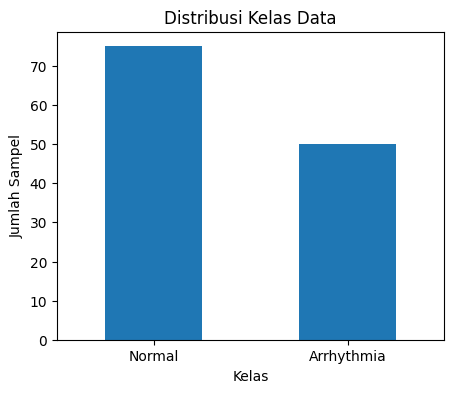

In [5]:
plt.figure(figsize=(5,4))
data['Label'].value_counts().plot(kind='bar')
plt.title('Distribusi Kelas Data')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=0)
plt.show()

### Distribusi Fitur (Histogram)
Histogram digunakan untuk melihat sebaran data, potensi outlier, dan perbedaan skala antar fitur.

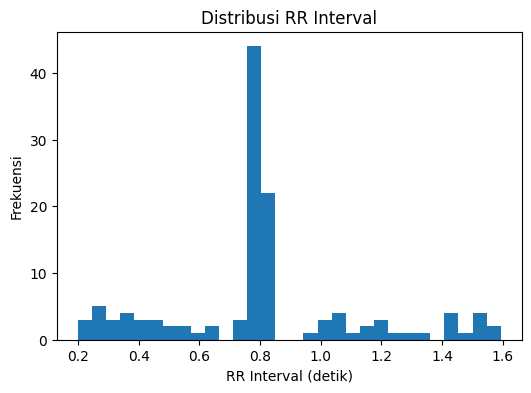

In [18]:
## Untuk RR Interval
plt.figure(figsize=(6,4))
plt.hist(data['RR_Interval_sec'], bins=30)
plt.title('Distribusi RR Interval')
plt.xlabel('RR Interval (detik)')
plt.ylabel('Frekuensi')
plt.show()

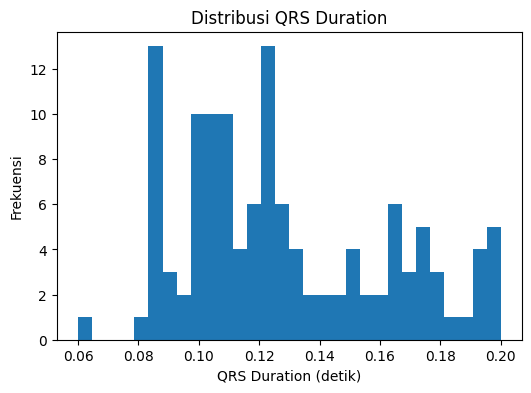

In [19]:
# Untuk QRS Duration
plt.figure(figsize=(6,4))
plt.hist(data['QRS_Duration_sec'], bins=30)
plt.title('Distribusi QRS Duration')
plt.xlabel('QRS Duration (detik)')
plt.ylabel('Frekuensi')
plt.show()

### Boxplot Deteksi Outlier
Boxplot membantu mengidentifikasi nilai ekstrem yang dapat memengaruhi performa model, khususnya pada algoritma berbasis jarak seperti SVM.

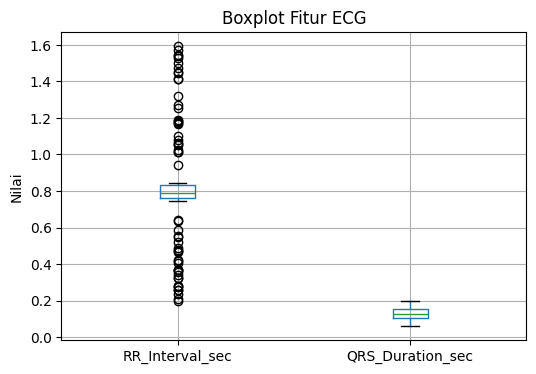

In [8]:
plt.figure(figsize=(6,4))
data[['RR_Interval_sec', 'QRS_Duration_sec']].boxplot()
plt.title('Boxplot Fitur ECG')
plt.ylabel('Nilai')
plt.show()

### Scatter Plot Antar Fitur
Scatter plot menunjukkan pola pemisahan antar kelas. Jika pemisahan tidak linear, maka SVM dengan kernel non-linear (RBF) menjadi pilihan yang tepat.

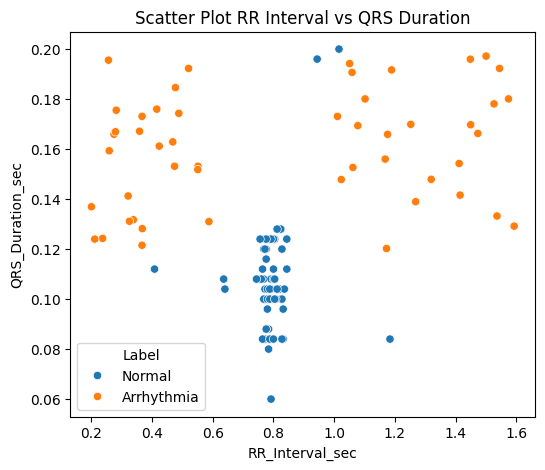

In [9]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    data=data,
    x='RR_Interval_sec',
    y='QRS_Duration_sec',
    hue='Label'
)
plt.title('Scatter Plot RR Interval vs QRS Duration')
plt.show()

### Encoding Label
Label kategorikal diubah menjadi numerik agar dapat diproses oleh algoritma Machine Learning.

In [10]:
data['Label'] = data['Label'].map({'Normal': 0, 'Arrhythmia': 1})

### Pemisahan Fitur dan Label

In [11]:
X = data[['RR_Interval_sec', 'QRS_Duration_sec']]
y = data['Label']

### Split Data Training dan Testing
Data dibagi menjadi 80% training dan 20% testing. Parameter stratify digunakan agar proporsi kelas tetap seimbang.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

### Pipeline Normalisasi dan Model SVM
- StandardScaler digunakan untuk normalisasi fitur
- Pipeline mencegah data leakage
- Kernel RBF dipilih karena data tidak terpisah secara linear

In [13]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(
        kernel='rbf',
        C=1.0,
        gamma='scale',
        random_state=42
    ))
])

### Training Model
Model SVM dilatih menggunakan data training yang telah dinormalisasi.

In [14]:
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(random_state=42))])

### Prediksi Data Uji

In [15]:
y_pred = svm_pipeline.predict(X_test)

### Evaluasi Model
Evaluasi dilakukan menggunakan:
- Accuracy
- Precision
- Recall
- F1-score

Metode ini lebih informatif dibandingkan hanya akurasi, terutama pada data medis.

In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Arrhythmia']))

Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      0.93      0.97        15
  Arrhythmia       0.91      1.00      0.95        10

    accuracy                           0.96        25
   macro avg       0.95      0.97      0.96        25
weighted avg       0.96      0.96      0.96        25



### Confusion Matrix
Confusion matrix menunjukkan performa model dalam mengklasifikasikan masing-masing kelas secara detail.

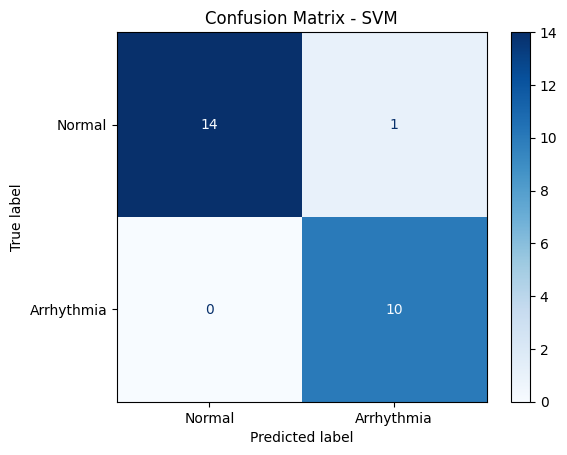

In [17]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Normal', 'Arrhythmia']
).plot(cmap='Blues')

plt.title('Confusion Matrix - SVM')
plt.show()
